In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
def get_main_score(scores):
    mode = stats.mode(scores)[0][0]
    return mode

In [3]:
def open_data(dirname):
  raw = [line[:-1] for line in open(dirname, encoding='utf-8')]
  data = [] # total Dialogues 4
  for line in raw:
          if line == '':
             data.append([])
          else:
             data[-1].append(line)
  return data

In [15]:
def analysis_emo(data,if_shuffle = True,n=50):
    if if_shuffle == True:
        random.shuffle(data)
        
    emo = []
    for session in data[:n]:
        session_emo = []
        for turn in session[:len(session)-1]:
            role, _, _, score = turn.split('\t')
            score = score.split(',')
            if role.upper() == 'USER':
                session_emo.append(get_main_score([int(item) for item in score]))
        emo.append(session_emo)              
                
    return emo

In [16]:
def emo_diff(score_list):
    Diff = []
    for k in range(len(score_list)):
        L = score_list[k]
        D = []
        for i,j in enumerate(L[:-1]):
            diff= L[i+1]-L[i]
            D.append(diff)  
        Diff.append(D)
    return Diff

In [43]:
dirname = 'SGD.txt'
sgd = open_data('SGD.txt')

In [62]:
emo_sgd = analysis_emo(sgd,if_shuffle = True)
Diff_sgd = emo_diff(emo_sgd)

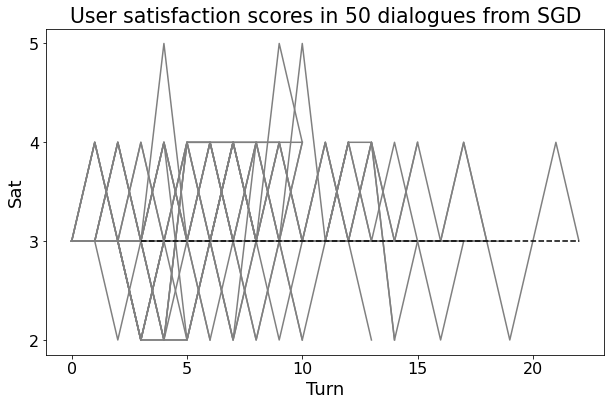

In [93]:
turns_max = np.max([len(d) for d in emo_sgd])
plt.figure(figsize=(10, 6))
for y in emo_sgd:
    x = np.arange(len(y))
    plt.plot(x, y,color='grey') 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(4))
plt.hlines(3, 3, turns_max-1, colors = "black", linestyles = "dashed")
plt.xlabel(u'Turn', fontsize=18)
plt.ylabel(u'Sat', fontsize=18)
plt.tick_params(labelsize=16) 
plt.title(u'User satisfaction scores in 50 dialogues from SGD', fontsize=20.5)
plt.savefig('sat.pdf', bbox_inches='tight')
plt.show()

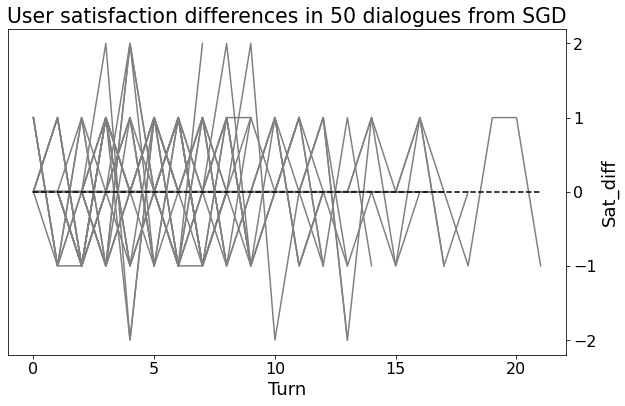

In [94]:
turns_max = np.max([len(d) for d in Diff_sgd])
plt.figure(figsize=(10, 6))
for y in Diff_sgd:
    x = np.arange(len(y))
    plt.plot(x, y,color='grey')
    
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position("right")
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))    
plt.hlines(0, 0, turns_max-1, colors = "black", linestyles = "dashed")
plt.xlabel(u'Turn', fontsize=18)
plt.ylabel(u'Sat_diff', fontsize=18)
plt.tick_params(labelsize=16) 
plt.title(u'User satisfaction differences in 50 dialogues from SGD', fontsize=20.5)
plt.savefig('sat_diff.pdf', bbox_inches='tight')
plt.show()